In [1]:
import pandas as pd
import numpy as np
import graphviz as gr
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1.Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and some observed covariates

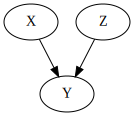

In [2]:
g = gr.Digraph()
g.edge("X", "Y")
g.edge("Z", "Y")
g

## When N=100

In [3]:
slope_estimates_b_1 = []
bias_estimates_b_1 = []
slope_estimates_b_2 = []
bias_estimates_b_2 = []

In [4]:
n = 100
a = 1
b = 10
c = 2

In [5]:
n=100
X = np.random.uniform(0, 1, n)
Z = np.random.uniform(0, 5, n)
e = np.random.normal(0,100,n)
Y = a + b*X + c*Z + e
data1 = pd.DataFrame(dict(Y = Y,
                         X = X,
                         Z = Z,
                         e = e))
data1.to_csv("data1(100Q1).csv", index=False)

In [6]:
for mc_replication in range(100):
    X = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 5, n)
    e = np.random.normal(0,100,n)
    Y = a + b*X + c*Z + e
    
   # a. You do not control for any covariates
    Ya = a + Z + e                 
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_b_1 = slope_estimates_b_1 + [res_a.params[1]]
    bias_estimates_b_1 = bias_estimates_b_1 + [res_a.params[0]]
   # b. You control for all the covariates that affect the outcome
    Yb = a + b*X + c*Z + e 
    mod_b = sm.OLS(Yb, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b_2 = slope_estimates_b_2 + [res_b.params[1]]
    bias_estimates_b_2 = bias_estimates_b_2 + [res_b.params[0]]

a. You do not control for any covariates

In [7]:
print('slope_estimate:',np.mean(slope_estimates_b_1))
print('bias_estimate:',np.mean(bias_estimates_b_1))

slope_estimate: 0.32561170722359345
bias_estimate: 3.3829753044138444


In [8]:
c0 = c*np.ones([100,1])
temp = slope_estimates_b_1 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 7.187177040267271 bias: -1.6743882927764064


b. You control for all the covariates that affect the outcome

In [9]:
print('slope_estimate:',np.mean(slope_estimates_b_2))
print('bias_estimate:',np.mean(bias_estimates_b_2))

slope_estimate: 1.329671396387197
bias_estimate: 8.355479188671543


In [10]:
c0 = c*np.ones([100,1])
temp = slope_estimates_b_2 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 6.9948264423221875 bias: -0.6703286036128032


## When N=1000

In [11]:
slope_estimates_b_1 = []
bias_estimates_b_1 = []
slope_estimates_b_2 = []
bias_estimates_b_2 = []

In [12]:
n = 1000
a = 1
b = 10
c = 2

In [13]:
n=1000
X = np.random.uniform(0, 1, n)
Z = np.random.uniform(0, 5, n)
e = np.random.normal(0,100,n)
Y = a + b*X + c*Z + e
data1 = pd.DataFrame(dict(  Y = Y,
                            X = X,
                            Z = Z,
                            e = e))
data1.to_csv("data1(1000Q1).csv", index=False)

In [14]:
for mc_replication in range(1000):
    X = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 5, n)
    e = np.random.normal(0,100,n)
    Y = a + b*X + c*Z + e
    
   # a. You do not control for any covariates
    Ya = a + c*Z + e               
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_b_1 = slope_estimates_b_1 + [res_a.params[1]]
    bias_estimates_b_1 = bias_estimates_b_1 + [res_a.params[0]]
   # b. You control for all the covariates that affect the outcome
    Yb = a + b*X + c*Z + e 
    mod_b = sm.OLS(Yb, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b_2 = slope_estimates_b_2 + [res_b.params[1]]
    bias_estimates_b_2 = bias_estimates_b_2 + [res_b.params[0]] 

a. You do not control for any covariates

In [15]:
print('slope_estimate:',np.mean(slope_estimates_b_1))
print('bias_estimate:',np.mean(bias_estimates_b_1))

slope_estimate: 1.9681314568038526
bias_estimate: 0.9165825784529316


In [16]:
c0 = c*np.ones([1000,1])
temp = slope_estimates_b_1 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 2.1984528367891203 bias: -0.031868543196147396


b. You control for all the covariates that affect the outcome

In [17]:
print('slope_estimate:',np.mean(slope_estimates_b_2))
print('bias_estimate:',np.mean(bias_estimates_b_2))

slope_estimate: 1.9714753640648697
bias_estimate: 5.908765216710595


In [18]:
c0 = c*np.ones([1000,1])
temp = slope_estimates_b_2 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 2.198706397458803 bias: -0.02852463593513054


##### A real life example is that people often consider many factors not just one factor, when they evaluate houses. They may consider the public safety in the area and the distance to companies and so on. All of these factors have an impact on housing prices.

# 2. Simulate a DGP with a confounder (common cause)

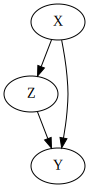

In [19]:
g = gr.Digraph()
g.edge("X", "Z")
g.edge("X", "Y")
g.edge("Z", "Y")
g

## When N=100

In [20]:
slope_estimates_b_1 = []
bias_estimates_b_1 = []
slope_estimates_b_2 = []
bias_estimates_b_2 = []

In [21]:
n = 100
a = 1
b = 10
c = 2
d = 3

In [22]:
n=100
X_1 = np.random.uniform(0, 1, n)
Z = np.random.uniform(0, 5, n)
X_2 = np.random.uniform(0, 1, n)
e = np.random.normal(0,100,n)
Y = a + b*X_1 + c*Z + d*X_2 + e
data1 = pd.DataFrame(dict(Y = Y,
                         X_1 = X_1,
                         X_2 = X_2,
                         Z = Z,
                         e = e))
data1.to_csv("data1(100Q2).csv", index=False)

In [23]:
for mc_replication in range(100):
    X_1 = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 5, n)
    X_2 = np.random.uniform(0, 1, n)
    e = np.random.normal(0,100,n)
    Y = a + b*X_1 + c*Z + d*X_2 + e
    
   # a. You fail to control for the confounder
    Ya = a + b*X_1 + d*X_2 + e                 
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_b_1 = slope_estimates_b_1 + [res_a.params[1]]
    bias_estimates_b_1 = bias_estimates_b_1 + [res_a.params[0]]
   # b. You do control for the confounder
    Yb = a + b*X_1 + c*Z + e
    Z = d*X_2 + e
    mod_b = sm.OLS(Yb, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b_2 = slope_estimates_b_2 + [res_b.params[1]]
    bias_estimates_b_2 = bias_estimates_b_2 + [res_b.params[0]]

a. You fail to control for the confounder

In [24]:
print('slope_estimate:',np.mean(slope_estimates_b_1))
print('bias_estimate:',np.mean(bias_estimates_b_1))

slope_estimate: -0.7982245661128187
bias_estimate: 8.921968523208024


In [25]:
c0 = c*np.ones([100,1])
temp = slope_estimates_b_1 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 6.536498628993583 bias: -2.7982245661128187


b. You do control for the confounder

In [26]:
print('slope_estimate:',np.mean(slope_estimates_b_2))
print('bias_estimate:',np.mean(bias_estimates_b_2))

slope_estimate: 1.0003690224537904
bias_estimate: 9.552026931188928


In [27]:
c0 = c*np.ones([100,1])
temp = slope_estimates_b_2 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.9996391816154413 bias: -0.9996309775462094


## When N=1000

In [28]:
slope_estimates_b_1 = []
bias_estimates_b_1 = []
slope_estimates_b_2 = []
bias_estimates_b_2 = []

In [29]:
n = 1000
a = 1
b = 10
c = 2
d = 3

In [30]:
n=1000
X_1 = np.random.uniform(0, 1, n)
Z = np.random.uniform(0, 5, n)
X_2 = np.random.uniform(0, 1, n)
e = np.random.normal(0,100,n)
Y = a + b*X_1 + c*Z + d*X_2 + e
data1 = pd.DataFrame(dict(Y = Y,
                         X_1 = X_1,
                         X_2 = X_2,
                         Z = Z,
                         e = e))
data1.to_csv("data1(1000Q2).csv", index=False)

In [31]:
for mc_replication in range(1000):
    X_1 = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 5, n)
    X_2 = np.random.uniform(0, 1, n)
    e = np.random.normal(0,100,n)
    Y = a + b*X_1 + c*Z + d*X_2 + e
    
   # a. You fail to control for the confounder
    Ya = a + b*X_1 + d*X_2 + e                 
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_b_1 = slope_estimates_b_1 + [res_a.params[1]]
    bias_estimates_b_1 = bias_estimates_b_1 + [res_a.params[0]]
   # b. You do control for the confounder
    Yb = a + b*X_1 + c*Z + e
    Z = d*X_2 + e
    mod_b = sm.OLS(Yb, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b_2 = slope_estimates_b_2 + [res_b.params[1]]
    bias_estimates_b_2 = bias_estimates_b_2 + [res_b.params[0]]

a. You fail to control for the confounder

In [32]:
print('slope_estimate:',np.mean(slope_estimates_b_1))
print('bias_estimate:',np.mean(bias_estimates_b_1))

slope_estimate: 0.04278710602494237
bias_estimate: 7.448634867035629


In [33]:
c0 = c*np.ones([1000,1])
temp = slope_estimates_b_1 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 2.929027751137602 bias: -1.957212893975057


b. You do control for the confounder

In [34]:
print('slope_estimate:',np.mean(slope_estimates_b_2))
print('bias_estimate:',np.mean(bias_estimates_b_2))

slope_estimate: 0.999987704220729
bias_estimate: 9.506082650532177


In [35]:
c0 = c*np.ones([1000,1])
temp = slope_estimates_b_2 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 1.0000131039778155 bias: -1.0000122957792712


##### A real life instance is the relationship between job performance and income. The confounder is the intelligence, which has impacts on both job performance and income.

# 3. Simulate a DGP with selection bias into the treatment

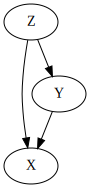

In [36]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("Z", "Y")
g.edge("Y", "X")
g.node("X", "X")
g

### When N=100

In [37]:
slope_estimates_b_1 = []
bias_estimates_b_1 = []
slope_estimates_b_2 = []
bias_estimates_b_2 = []

In [38]:
n = 100
a = 1
b = 10
c = 2

In [39]:
n=100
X = np.random.uniform(0, 1, n)
Z = np.random.uniform(0, 5, n)
e = np.random.normal(0,100,n)
Y = a + c*Z + e
data1 = pd.DataFrame(dict(Y = Y,
                          X = X,
                          Z = Z,
                          e = e))
data1.to_csv("data1(100Q3).csv", index=False)

In [40]:
for mc_replication in range(100):
    X = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 5, n)
    e = np.random.normal(0,100,n)
    Y = a + c*Z + e
    
   # a. You control for the variable in between the path from cause to effect
    Ya = a + c*Z + e                
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_b_1 = slope_estimates_b_1 + [res_a.params[1]]
    bias_estimates_b_1 = bias_estimates_b_1 + [res_a.params[0]]
   # b. You do not control for the variable in between the path from cause to effect
    Yb = a + b*X + c*Z + e
    X = a + c*Z + Yb + e
    mod_b = sm.OLS(Yb, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b_2 = slope_estimates_b_2 + [res_b.params[1]]
    bias_estimates_b_2 = bias_estimates_b_2 + [res_b.params[0]]

a. You control for the variable in between the path from cause to effect

In [41]:
print('slope_estimate:',np.mean(slope_estimates_b_1))
print('bias_estimate:',np.mean(bias_estimates_b_1))

slope_estimate: 2.360791020019045
bias_estimate: 1.7195539431177784


In [42]:
c0 = c*np.ones([100,1])
temp = slope_estimates_b_1 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 7.097951265865863 bias: 0.360791020019045


b. You do not control for the variable in between the path from cause to effect

In [43]:
print('slope_estimate:',np.mean(slope_estimates_b_2))
print('bias_estimate:',np.mean(bias_estimates_b_2))

slope_estimate: 2.339477710502729
bias_estimate: 6.751522350764564


In [44]:
c0 = c*np.ones([100,1])
temp = slope_estimates_b_2 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 7.068454079963683 bias: 0.33947771050272935


### When N=1000

In [45]:
slope_estimates_b_1 = []
bias_estimates_b_1 = []
slope_estimates_b_2 = []
bias_estimates_b_2 = []

In [46]:
n = 1000
a = 1
b = 10
c = 2

In [47]:
n=1000
X = np.random.uniform(0, 1, n)
Z = np.random.uniform(0, 5, n)
e = np.random.normal(0,100,n)
Y = a + c*Z + e
data1 = pd.DataFrame(dict(Y = Y,
                          X = X,
                          Z = Z,
                          e = e))
data1.to_csv("data1(1000Q3).csv", index=False)

In [48]:
for mc_replication in range(1000):
    X = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 5, n)
    e = np.random.normal(0,100,n)
    Y = a + c*Z + e
    
   # a. You control for the variable in between the path from cause to effect
    Ya = a + c*Z + e                
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_b_1 = slope_estimates_b_1 + [res_a.params[1]]
    bias_estimates_b_1 = bias_estimates_b_1 + [res_a.params[0]]
   # b. You do not control for the variable in between the path from cause to effect
    Yb = a + b*X + c*Z + e
    X = a + c*Z + Yb + e
    mod_b = sm.OLS(Yb, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b_2 = slope_estimates_b_2 + [res_b.params[1]]
    bias_estimates_b_2 = bias_estimates_b_2 + [res_b.params[0]]

a. You control for the variable in between the path from cause to effect

In [49]:
print('slope_estimate:',np.mean(slope_estimates_b_1))
print('bias_estimate:',np.mean(bias_estimates_b_1))

slope_estimate: 1.9685874350119907
bias_estimate: 1.1351792487897834


In [50]:
c0 = c*np.ones([1000,1])
temp = slope_estimates_b_1 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 2.254362692512626 bias: -0.031412564988009456


b. You do not control for the variable in between the path from cause to effect

In [51]:
print('slope_estimate:',np.mean(slope_estimates_b_2))
print('bias_estimate:',np.mean(bias_estimates_b_2))

slope_estimate: 1.9686319626493778
bias_estimate: 6.133891107765194


In [52]:
c0 = c*np.ones([1000,1])
temp = slope_estimates_b_2 - c0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 2.2555246659787347 bias: -0.03136803735062225


A real life example is the relationship between financial literacy and personal investment as well as family wealth. If you control for family wealth when analyzing the relaionship btween financial literacy and personal investment, there will be a selection bias. Financial literacy has impact on both personal personal investment and family wealth, and personal investment also affects family wealth.